In [1]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_50k_departure_status.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
                                                                                'short_stay_unit_departure_status':'str'})

In [3]:
list(dataset.columns)

['establishment_code',
 'sex',
 'ethnicity',
 'marital_status',
 'interpreter_required',
 'employment_status',
 'occupation',
 'triage_category',
 'departure_status',
 'destination_on_departure',
 'visit_type',
 'mode_of_arrival',
 'referral_source',
 'primary_diagnosis',
 'presenting_complaint',
 'major_diagnostic_category',
 'human_intent_of_injury',
 'external_cause_of_injury',
 'STATE',
 'referred_to_on_departure',
 'additional_diagnosis',
 'short_stay_unit_destination_on_departure',
 'short_stay_unit_departure_status',
 'senior_doctor_type',
 'place_where_injury_occurred',
 'type_of_activity_when_injury_occurred',
 'ambulance_number',
 'statistical_area_2_2016',
 'payment_classification',
 'aboriginality',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'additional_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'australian_postcode',
 'metropolitan_hospital_flag',
 'rural_hospital_flag',
 

In [6]:
data[data.select_dtypes(np.float64).columns] = data.select_dtypes(np.float64).astype(np.float32)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47499 entries, 0 to 47498
Data columns (total 76 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   establishment_code                                                                         47499 non-null  int64  
 1   sex                                                                                        47499 non-null  int64  
 2   ethnicity                                                                                  47499 non-null  int64  
 3   marital_status                                                                             47499 non-null  int64  
 4   interpreter_required                                                                       47499 non-null  int64  
 5   employment_status                             

In [7]:
dataset.shape

(49999, 76)

In [8]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47499, 76)
Unseen Data For Predictions: (2500, 76)


In [9]:
from pycaret.classification import *

In [24]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'departure_status',
                         ignore_features = ['reattendance_within_48_hours_for_the_same_condition_denominator', 
                                          'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
                                          'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',  
                                          'short_stay_unit_destination_on_departure',
                                          'short_stay_unit_departure_status',
                                          'destination_on_departure',
                                          'referred_to_on_departure',
                                          'departure_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
                                          'departure_with_length_of_episode_less_than_or_equal_to_4_hours',
                                          'transfer_with_length_of_episode_less_than_or_equal_to_4_hours',  
                                          'transfer_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',  
                                          'admission',
                                          'departure',
                                          'transfer'  
                                          ],
                         normalize = True,
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode','primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         bin_numeric_features = ['age'],
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,departure_status
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(47499, 76)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,54
8,Ordinal Features,True
9,High Cardinality Features,True


In [25]:
best_model = compare_models(exclude = ['gbc', 'svm', 'lda','qda','knn','lr'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8766,0.2832,0.4140,0.8628,0.8600,0.6855,0.6938,16.1880
rf,Random Forest Classifier,0.8650,0.2799,0.3742,0.8437,0.8436,0.6431,0.6597,6.4000
et,Extra Trees Classifier,0.8644,0.2777,0.3761,0.8429,0.8436,0.6427,0.6582,11.1600
ridge,Ridge Classifier,0.8491,0.0000,0.3350,0.8214,0.8227,0.5901,0.6146,2.7220
lightgbm,Light Gradient Boosting Machine,0.8356,0.2513,0.4151,0.8309,0.8321,0.6106,0.6117,1.1610
dt,Decision Tree Classifier,0.8149,0.2394,0.4463,0.8138,0.8143,0.5717,0.5717,1.2610
ada,Ada Boost Classifier,0.7594,0.1442,0.2918,0.6829,0.6733,0.2080,0.3157,12.1080
dummy,Dummy Classifier,0.7268,0.1500,0.1375,0.5282,0.6118,0.0000,0.0000,0.1330
nb,Naive Bayes,0.1150,0.1656,0.2296,0.7664,0.1793,0.0431,0.0802,1.6770


In [26]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8779,0.0000,0.4064,0.8586,0.8609,0.6869,0.6964
1,0.8782,0.0000,0.4043,0.8722,0.8602,0.6882,0.6972
2,0.8785,0.0000,0.4222,0.8699,0.8634,0.6915,0.6991
3,0.8791,0.0000,0.4224,0.8669,0.8642,0.6937,0.7012
4,0.8758,0.0000,0.4829,0.8665,0.8596,0.6839,0.6920
5,0.8725,0.0000,0.4040,0.8617,0.8544,0.6754,0.6835
6,0.8776,0.9467,0.3598,0.8597,0.8614,0.6904,0.6974
7,0.8758,0.9397,0.4843,0.8601,0.8597,0.6842,0.6921
8,0.8791,0.9452,0.3547,0.8644,0.8624,0.6913,0.6999


In [27]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8803,0.0000,0.4049,0.8573,0.8637,0.6944,0.7030
1,0.8803,0.0000,0.4042,0.8708,0.8632,0.6955,0.7032
2,0.8743,0.0000,0.4114,0.8653,0.8584,0.6829,0.6891
3,0.8755,0.0000,0.4145,0.8583,0.8602,0.6854,0.6922
4,0.8752,0.0000,0.4183,0.8672,0.8600,0.6842,0.6912
5,0.8698,0.0000,0.4058,0.8533,0.8534,0.6729,0.6786
6,0.8842,0.9449,0.3731,0.8683,0.8707,0.7109,0.7160
7,0.8755,0.9356,0.3660,0.8624,0.8610,0.6864,0.6926
8,0.8800,0.9423,0.3700,0.8677,0.8661,0.6983,0.7042


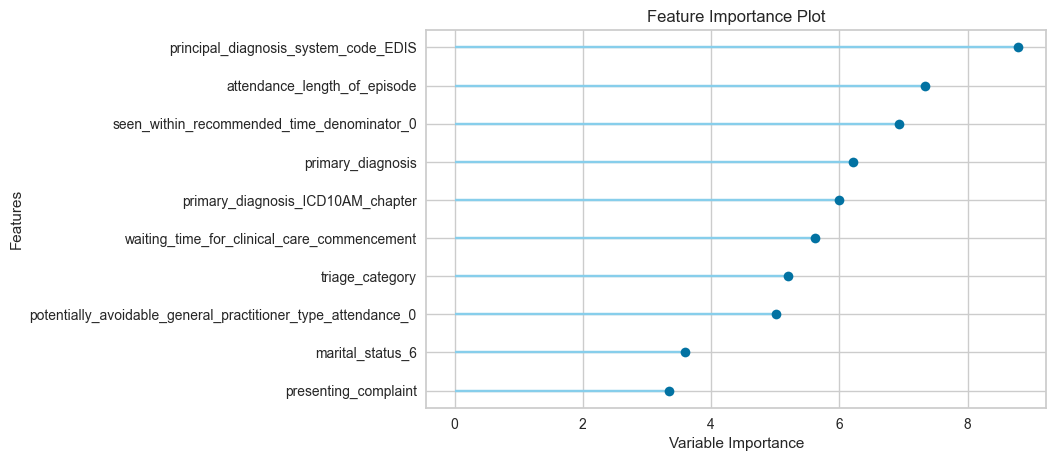

In [28]:
plot_model(catboost, plot='feature')

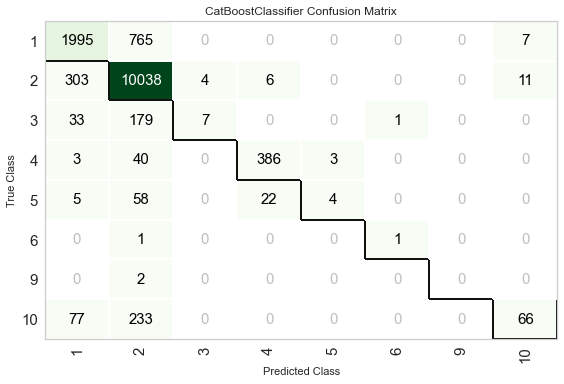

In [29]:
plot_model(catboost, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

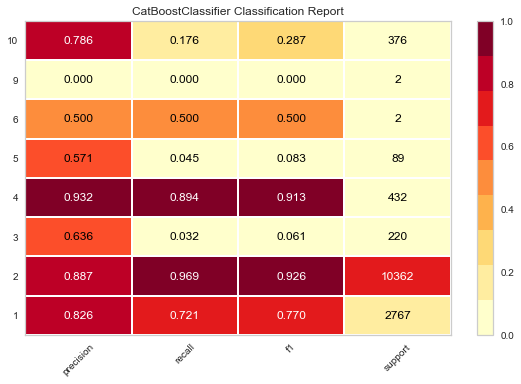

In [30]:
#departure_status	description
#1	Admitted to ward/other admitted patient unit
#2	ED service event completed; departed under own care
#3	Transferred to another hospital for admission
#4	Did not wait to be attended by medical officer
#5	Left at own risk
#6	Died in ED
#7	Dead on arrival, not treated in ED
#8	Referred to After Hours General Practitioner
#9	Unknown
#10	Admitted to ED Observation Ward


plot_model(catboost, plot = 'class_report')

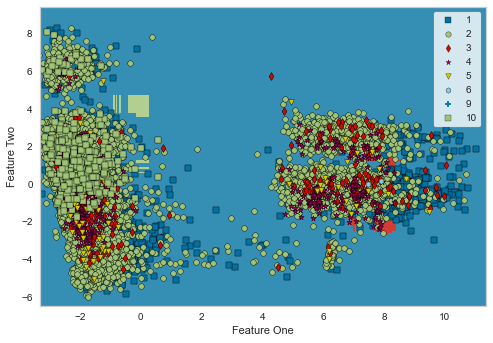

In [31]:
plot_model(catboost, plot='boundary')

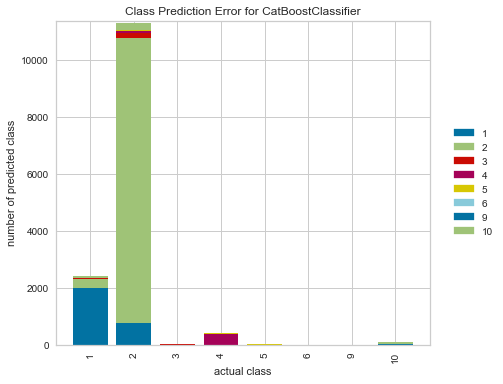

In [32]:
plot_model(catboost, plot = 'error')

In [33]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8770,0.9451,0.4169,0.8678,0.8597,0.6834,0.6935


IndexError: index 10 is out of bounds for axis 0 with size 8

In [35]:
final_catboost = finalize_model(catboost)

In [36]:
#Final Catboost parameters for deployment
print(catboost)

In [41]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
catunseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8784,0,0.4100,0.8632,0.8623,0.6958,0.7032


IndexError: index 10 is out of bounds for axis 0 with size 8

In [38]:
unseen_predictions[["departure_status","Label"]].head(50)

NameError: name 'unseen_predictions' is not defined

In [40]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['departure_status'], unseen_predictions['Label'], metric = 'Accuracy')

NameError: name 'unseen_predictions' is not defined

In [42]:
save_model(final_catboost,'Final Catboost 22-06-22')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['reattendance_within_48_hours_for_the_same_condition_denominator',
                                                        'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
                                                        'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
                                                        'short_stay_unit_destin...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='departure_status')),
                 ('fix_perfect', Remove_100(target='departure_status')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
        